Week 25 - Portfolio Project 
Manpreet Matharu 
02/12/2023 

Supervised Learning - Classification
Predicting whether a loan will be approved (target variable) given a set of features or willit be rejected  
Dataset - Loan application dataset                                                                                                                                          Source - Kaggle/GitHub Data Dictionary                                                                                                                                                       
Field   Description                                                                                                                                                                      
 1 loan_id - Unique loan id                                                                                                                                                                                                         
 2 gender - Gender of applicant                                                                                                                                                                                                     
 3 married - Marital status - Yes / No                                                                                                                                                                                             
 4 dependents - Number of dependents   
 5 education - Graduate or Not graduate                                                                                                                                                                                             
 6 self_employed - Self employed Yes/No                                                                                                                                                                                             
 7 applicant_income - Income in pounds                                                                                                                                                                                             
 8 coapplicant_income - Coapplicant income in pounds                                                                                                                                                                               
 9 loan_amount - Loan amount (thousands)                                                                                                                                                                                           
 10 loan_amount_term - Term of loan (months)                                                                                                                                                                                       
 11 credit_history - Credict history 0 or 1                                                                                                                                                                                         
 12 property_area - 3 options rural, urban, semiurban                                                                                                                                                                             
 13 loan_status - Approved (0) or Rejected (1)                                                                                                                                                                                     

In [3]:
#0.Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [18]:
#1. Directory
print(os.getcwd())
print(os.chdir(r'C:\Users\Preet\Documents\2023_ML course\ML_2023_course\Wk25\RA_25_3'))
print(os.listdir())

C:\Users\Preet\Documents\2023_ML course\ML_2023_course\Wk25\RA_25_3
None
['.ipynb_checkpoints', 'loans.csv', 'Loan_defaultv2.xlsx', 'MM_LoanDefault-checkpointv2.ipynb']


In [19]:
#2a. Import and preview data

data = pd.read_csv('loans.csv')  
data.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,1


In [20]:
#2b.Count number of rows 
num_rows, num_cols = data.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 553
Number of columns: 13


In [22]:
#3. Exploratory Data Analysis - Remove the LoadID
data.drop(columns=["loan_id"], inplace=True)


In [23]:
#3b. Counts and data types per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              553 non-null    object 
 1   married             553 non-null    object 
 2   dependents          553 non-null    object 
 3   education           553 non-null    object 
 4   self_employed       553 non-null    object 
 5   applicant_income    553 non-null    int64  
 6   coapplicant_income  553 non-null    float64
 7   loan_amount         553 non-null    int64  
 8   loan_amount_term    553 non-null    int64  
 9   credit_history      553 non-null    int64  
 10  property_area       553 non-null    object 
 11  loan_status         553 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 52.0+ KB


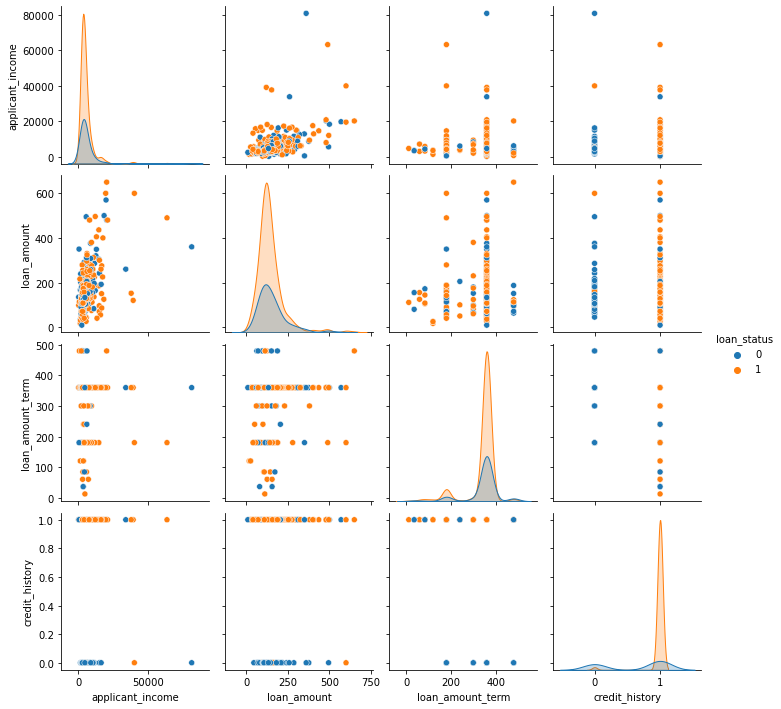

In [26]:
#3c.Distributions and relationships for all the integer fields
int_columns = data.select_dtypes(include='int64').columns

int_data = data[int_columns]

sns.pairplot(data=int_data, diag_kind="auto", hue="loan_status")
plt.show()


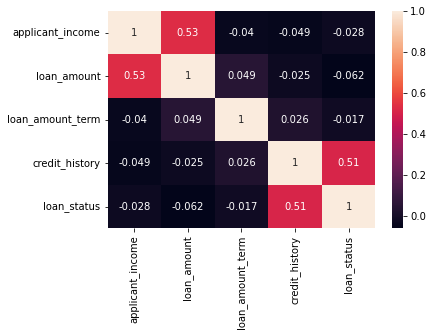

In [27]:
#3d.Generating correlation matrix and heatmap for int64 variables
corr_matrix = int_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [29]:
# 3e. Target frequency
data["loan_status"].value_counts(normalize=True)

1    0.703436
0    0.296564
Name: loan_status, dtype: float64

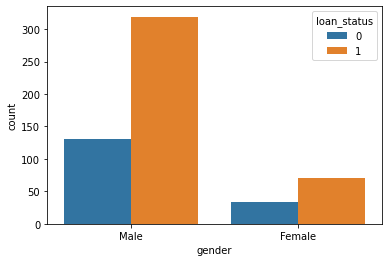

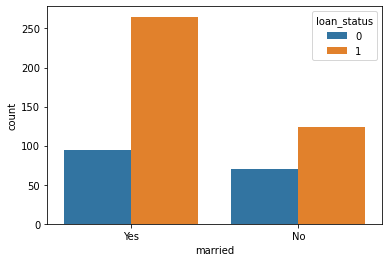

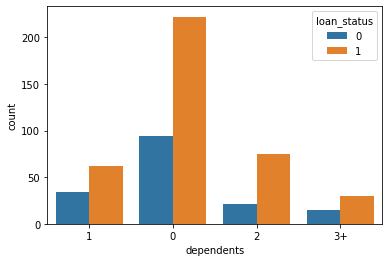

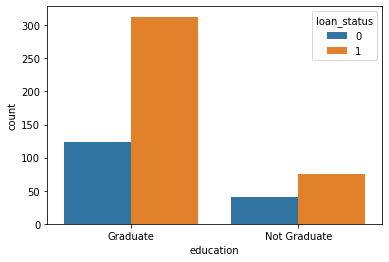

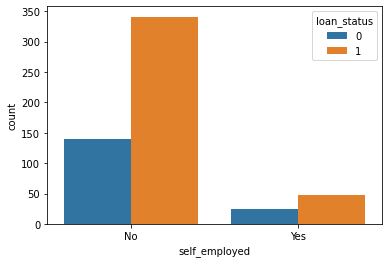

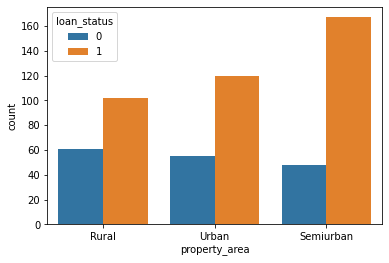

In [30]:
# 3f. Class frequency by loan_status
for col in data.columns[data.dtypes == "object"]:
    sns.countplot(data=data, x=col, hue="loan_status")
    plt.show()

In [32]:
# 4. Modelling 
# 1. Model using loan_amount and loan_status
X = data[["loan_amount"]]
y = data[["loan_status"]]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42, stratify=y)
                                                    
# Preview the training set
print(X_train[:5], "\n", y_train[:5])


     loan_amount
7            168
33           184
26           120
295           67
265          110 
      loan_status
7              1
33             1
26             1
295            1
265            1


In [33]:
# 5. Instantiate a logistic regression model

y_train = np.ravel(y_train)
clf = LogisticRegression(random_state=42)

# Fit to the training data
clf.fit(X_train, y_train)

# Predict test set values
y_pred = clf.predict(X_test)

# Check the model's first five predictions
print(y_pred[:5])


[1 1 1 1 1]


In [34]:
# 7. Accuarcy 

print(clf.score(X_test, y_test))

0.6987951807228916


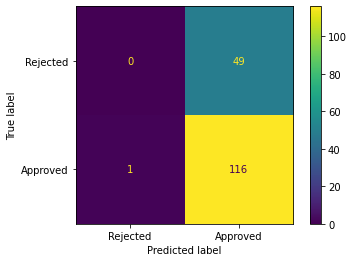

In [35]:
#8.Confusion matrix - WHAT DOES THE CM SHOW
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Rejected", "Approved"])
disp.plot()
plt.show()

In [36]:
# 9. Feature Engineering Convert categorical features to binary
data1 = pd.get_dummies(data)

# Previewing the new DataFrame
data1.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,4583,1508.0,128,360,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,3000,0.0,66,360,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,2583,2358.0,120,360,1,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
3,6000,0.0,141,360,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
4,5417,4196.0,267,360,1,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1


In [43]:
# 10.Resplit into features and targets

X1 = data1.drop(columns=["loan_status"])
y1 = data1["loan_status"]



In [44]:
# 11. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1,
                                                    y1,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [55]:
#12. Scale the features and create a logistic regression model

# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression model and set max_iter
clf = LogisticRegression(random_state=42, max_iter=200)  # Adjust max_iter as needed
clf.fit(X_train_scaled, y_train)

# Remove feature names from test data
X_test_without_names = X_test.copy()
X_test_without_names.columns = range(X_test_without_names.shape[1])

# Calculate and print the model score
print(clf.score(X_test_without_names, y_test))



0.4578313253012048


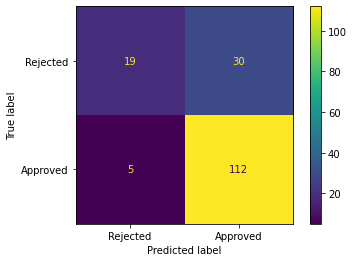

In [56]:
#15. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Rejected", "Approved"])
disp.plot()
plt.show()

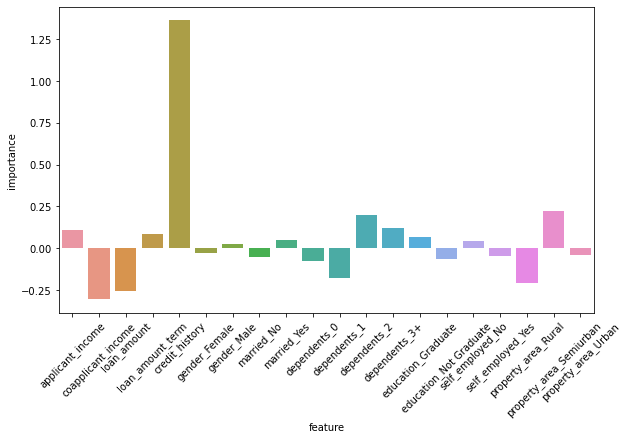

In [57]:
#16 Finding the importance of features

feature_importance = pd.DataFrame({
    "feature": X_train.columns, 
    "importance": clf.coef_.reshape(-1)})
plt.figure(figsize=(9,5)) 
sns.barplot(data=feature_importance, x="feature", y="importance")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [58]:
#17. Decision Tree classifier 

# Assuming 'X_train' and 'y_train' are your training data
# Reshaping the target variable 'y_train' if needed
y_train = np.ravel(y_train)

# Instantiate a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit to the training data
clf.fit(X_train, y_train)

# Predict test set values
y_pred = clf.predict(X_test)

# Check the model's first five predictions
print(y_pred[:5])

[1 0 1 1 1]


In [59]:
#18  Performing hyperparameter tuning for a Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Assuming 'X_train' and 'y_train' are your training data

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],  # Example values for max depth
    'min_samples_split': [2, 5, 10],  # Example values for min samples split
    # Add other hyperparameters and values to explore
}

# Instantiate a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to predict on test set
y_pred = best_estimator.predict(X_test)

# Check the model's first five predictions
print(y_pred[:5])



[1 1 1 1 0]


In [31]:
#19. Random Forest Classifer 
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('loans.csv')

# Remove non-numeric characters from 'dependents' column
data['dependents'] = data['dependents'].str.replace('+', '', regex=True).astype(float)

# Update the list of numerical columns
numerical_cols = ['dependents', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history']

# Split features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Define categorical and numerical features
categorical_cols = ['gender', 'married', 'education', 'self_employed', 'property_area']
numerical_cols = ['dependents', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history']

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7567567567567568
              precision    recall  f1-score   support

           0       0.68      0.38      0.49        34
           1       0.77      0.92      0.84        77

    accuracy                           0.76       111
   macro avg       0.73      0.65      0.67       111
weighted avg       0.74      0.76      0.73       111



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('loans.csv')

# Remove non-numeric characters from 'dependents' column
data['dependents'] = data['dependents'].str.replace('+', '', regex=True).astype(float)

# Split features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Define categorical and numerical features
categorical_cols = ['gender', 'married', 'education', 'self_employed', 'property_area']
numerical_cols = ['dependents', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history']

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model - Support Vector Machine (SVM) Classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(random_state=42))])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8018018018018018
              precision    recall  f1-score   support

           0       1.00      0.35      0.52        34
           1       0.78      1.00      0.88        77

    accuracy                           0.80       111
   macro avg       0.89      0.68      0.70       111
weighted avg       0.85      0.80      0.77       111



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('loans.csv')

# Remove non-numeric characters from 'dependents' column
data['dependents'] = data['dependents'].str.replace('+', '', regex=True).astype(float)

# Split features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Define categorical and numerical features
categorical_cols = ['gender', 'married', 'education', 'self_employed', 'property_area']
numerical_cols = ['dependents', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history']

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model - K-Nearest Neighbors (KNN) Classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7657657657657657
              precision    recall  f1-score   support

           0       0.72      0.38      0.50        34
           1       0.77      0.94      0.85        77

    accuracy                           0.77       111
   macro avg       0.75      0.66      0.67       111
weighted avg       0.76      0.77      0.74       111

